In [1]:
import pandas as pd
import numpy as np

# Charger un fichier CSV
data = pd.read_csv('project_data/out12.csv')

# Afficher les premières lignes pour vérifier que tout est bien chargé
print(data.head())

   day      tick  logprice
0    1  0.002436  4.169607
1    1  0.002479  4.168214
2    1  0.002564  4.168214
3    1  0.003034  4.168214
4    1  0.003590  4.168524


In [2]:
# Vérification des colonnes et des types de données
print(data.info())

# Vérification des statistiques descriptives
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615411 entries, 0 to 1615410
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   day       1615411 non-null  int64  
 1   tick      1615411 non-null  float64
 2   logprice  1615411 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 37.0 MB
None
                day          tick      logprice
count  1.615411e+06  1.615411e+06  1.615411e+06
mean   3.506311e+02  4.691223e-01  3.271953e+00
std    2.006379e+02  3.295130e-01  5.404537e-01
min    1.000000e+00  4.273504e-05  1.730770e+00
25%    1.890000e+02  1.581624e-01  2.930127e+00
50%    3.290000e+02  4.247863e-01  3.189241e+00
75%    5.060000e+02  7.835897e-01  3.665867e+00
max    7.540000e+02  1.000000e+00  4.367547e+00


In [3]:
# Calculer les log returns à partir de 'logprice'
data['log_return'] = data['logprice'].diff()

# Supprimer les lignes avec des valeurs NaN
data = data.dropna(subset=['log_return'])

print(data[['day', 'tick', 'logprice', 'log_return']].head())


   day      tick  logprice  log_return
1    1  0.002479  4.168214   -0.001392
2    1  0.002564  4.168214    0.000000
3    1  0.003034  4.168214    0.000000
4    1  0.003590  4.168524    0.000310
5    1  0.003675  4.168060   -0.000464


# Return series 
## Complete time series

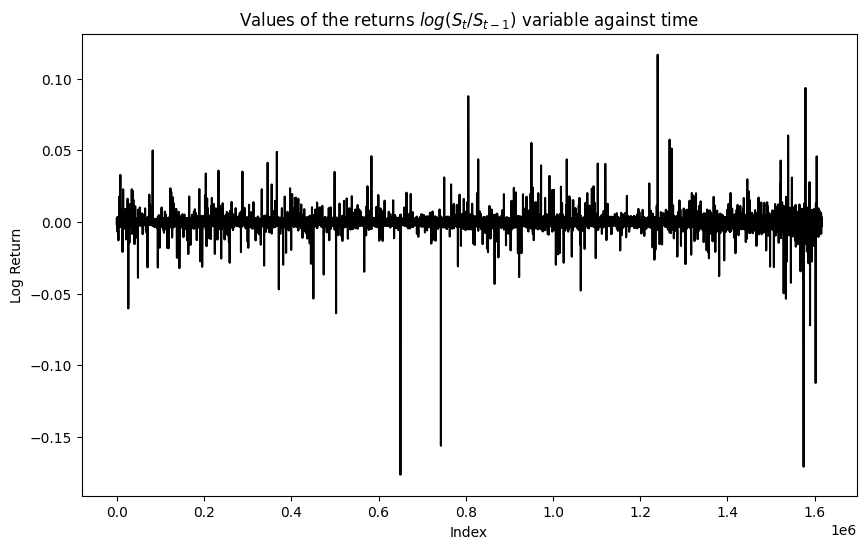

In [4]:
import matplotlib.pyplot as plt

# Tracer les rendements en noir
plt.figure(figsize=(10,6))
plt.plot(data['log_return'], color='black')  # Définir la couleur en noir
plt.title(r'Values of the returns $log(S_t/S_{t-1})$ variable against time', color='black')
plt.xlabel('Index', color='black')
plt.ylabel('Log Return', color='black')

# Ajuster les couleurs des axes en noir
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

# Afficher le graphique
plt.show()



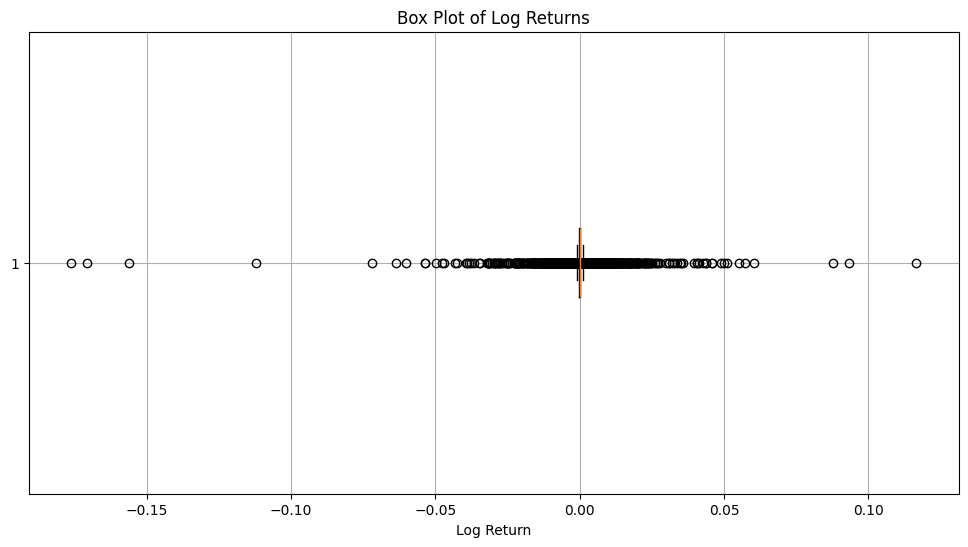

In [5]:
plt.figure(figsize=(12, 6))
plt.boxplot(data['log_return'].dropna(), vert=False)
plt.title('Box Plot of Log Returns')
plt.xlabel('Log Return')
plt.grid(True)
plt.show()

## Time series on the first day

In [6]:
# Filtrer les données pour le jour 1
day_1_data = data[data['day'] == 1]

# Afficher la première et la dernière ligne
first_row = day_1_data.head(1)
last_row = day_1_data.tail(1)

print("Première ligne du jour 1:")
print(first_row)

print("\nDernière ligne du jour 1:")
print(last_row)


Première ligne du jour 1:
   day      tick  logprice  log_return
1    1  0.002479  4.168214   -0.001392

Dernière ligne du jour 1:
      day      tick  logprice  log_return
1638    1  0.999957  4.187683    0.000152


### Assumption of Data Frequency:
Time Interval: 
To estimate the time interval between observations, you can divide the total duration of the trading day by the number of observations.
A typical trading day in many markets lasts about 6.5 hours (e.g., from 9:30 AM to 4:00 PM in U.S. markets), which translates to 23,400 seconds.
Therefore, the average time interval between observations can be calculated as:
$$
\Delta_t=\frac{23400s}{1638 obs} = 14.3s
$$

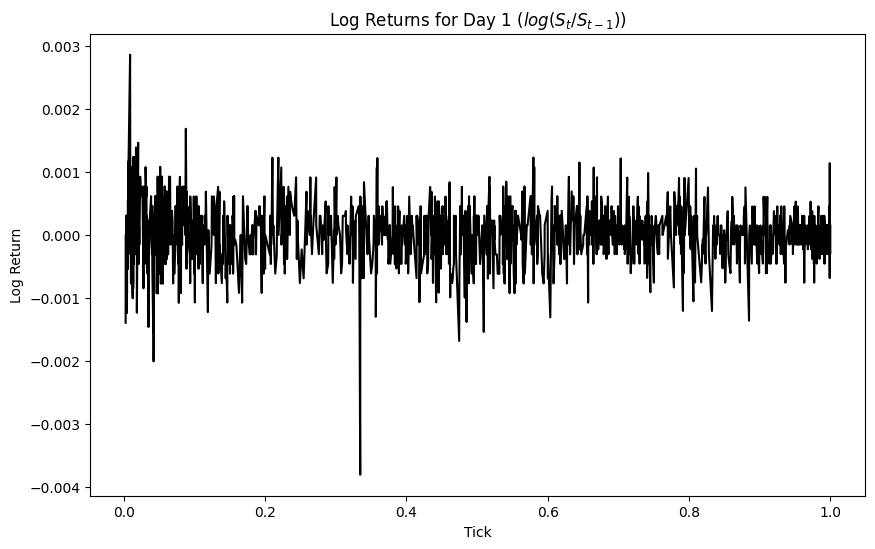

In [7]:
# Filtrer les données pour le jour 1
day_1_data = data[data['day'] == 1]

# Tracer les rendements du jour 1 en fonction de tick
plt.figure(figsize=(10,6))
plt.plot(day_1_data['tick'], day_1_data['log_return'], color='black')  # Tracer les rendements avec tick en abscisse
plt.title(r'Log Returns for Day 1 ($log(S_t/S_{t-1})$)', color='black')
plt.xlabel('Tick', color='black')  # X-axis in [0,1]
plt.ylabel('Log Return', color='black')

# Ajuster les couleurs des axes en noir
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

# Afficher le graphique
plt.show()

# Daily log return



In [8]:
daily_log_returns = data.groupby('day')['log_return'].sum().reset_index()
print(daily_log_returns)

     day  log_return
0      1    0.018076
1      2    0.014020
2      3   -0.006910
3      4    0.004062
4      5   -0.006779
..   ...         ...
749  750   -0.014718
750  751    0.040361
751  752    0.046376
752  753    0.038523
753  754    0.036394

[754 rows x 2 columns]


# Historical volatility

We call daily volatility of the asset, the standard deviation of the daily log-returns.
If we observe prices on $T$ days, then we can estimate $\sigma_d$ by the square root of the empirical variance:
$$
\sigma_d^2 = \frac{1}{T} \sum_{t=1}^{T} R_t^2-\bar R_t^2
$$
Where : 
$$
\bar R_t = \frac{1}{T}\sum_{t=1}^{T} R_t^2
$$


In [9]:
T = len(daily_log_returns)
Rt_bar = (1 / T) * (daily_log_returns['log_return'] ** 2).sum()
sigma_day = (1/T)*(daily_log_returns['log_return']**2-Rt_bar**2).sum()
# 252 trading days
sigma_year = np.sqrt(252)*sigma_day
sigma_month = sigma_year/np.sqrt(12)
print("Mean of the squareddaily log Return :", Rt_bar)
print("Daily volatility : ", sigma_day)
print("Annualized volatility : ", sigma_year)
print("Monthly volatility : ", sigma_month)

Mean of the squareddaily log Return : 0.0013285831157353884
Daily volatility :  0.0013268179826399714
Annualized volatility :  0.02106258250268268
Monthly volatility :  0.006080243838876274
